# 3.1. Contact with Spiral Torus

- Does the contact point between the ball and the Spiral Torus lie in the plane of the Frenet coordinate system, and does the long diameter of the contact ellipse also lie in the plane?

![Asset1](Asset1.svg)

- Where does the force balance in a ball sandwiched between two Spiral Torus? 

![Asset4](Asset4.svg)


These questions will be examined.

## 3.1.1. Create a mesh on the Spiral Torus and measure the distance
Create a mesh on top of the Spiral Torus and measure the distance to a point.

![Asset2](Asset2.svg)



In [1]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.collections import LineCollection


In [3]:
import sys
import pathlib
import os
sys.path.append(str(pathlib.Path(os.path.abspath('')).resolve().parent.parent))
from IPython.display import display, HTML

from _9_Mechanics.Spiral import Spiral


In [5]:
R = 6.35 / 2
Rg = R * 1.08
dR = R * 0.08 / np.sqrt(2)
PCR = 20.875
SP0 = Spiral(alp=np.deg2rad(0e-3), l=10.0, r=PCR, eta=np.array([[-dR, -dR],[0,0]]), R=np.array([Rg, 0]))


In [7]:
def plot_2d_mesh(x, y, xl='', yl=''):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(x, y)
    ax.set_aspect('equal', adjustable='box')

    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    plt.gca().add_collection(LineCollection(segs1))
    plt.gca().add_collection(LineCollection(segs2))
    plt.xlabel(xl)
    plt.ylabel(yl)
    return ax


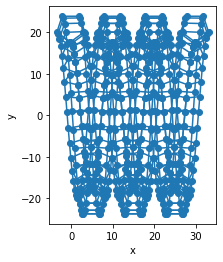

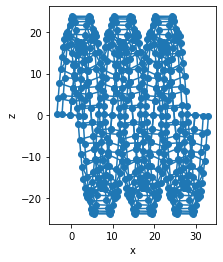

In [9]:
th = np.deg2rad(np.linspace(0, 1080, int(1e2)))
alp = np.deg2rad(np.linspace(0, 360, int(6)))

xyz = SP0.get_mesh(th, alp, 0)

fig = plot_2d_mesh(xyz[:,:,0], xyz[:,:,1], 'x', 'y')
fig = plot_2d_mesh(xyz[:,:,0], xyz[:,:,2], 'x', 'z')
plt.show()


Assume the surface of a ball screw and create a mesh at a contact angle of 45 degrees.

![Asset3](Asset3.svg)


dth = 0.014472077412736654
dalp = 0.013299400564331869


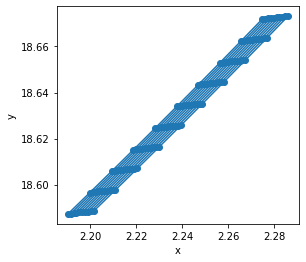

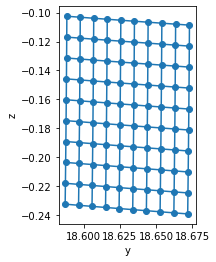

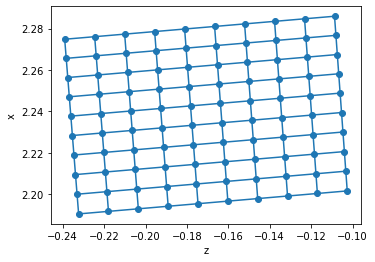

In [10]:
th = np.deg2rad(np.linspace(-0.2, 0.2, int(1e1)))
alp = np.deg2rad(np.linspace(44, 46, int(1e1)))

xyz = SP0.get_mesh(th, alp, 0)
print('dth = '  + str(np.linalg.norm(xyz[1,0,:] - xyz[0,0,:])))
print('dalp = ' + str(np.linalg.norm(xyz[0,1,:] - xyz[0,0,:])))

fig = plot_2d_mesh(xyz[:,:,0], xyz[:,:,1], 'x', 'y')
fig = plot_2d_mesh(xyz[:,:,1], xyz[:,:,2], 'y', 'z')
fig = plot_2d_mesh(xyz[:,:,2], xyz[:,:,0], 'z', 'x')
plt.show()

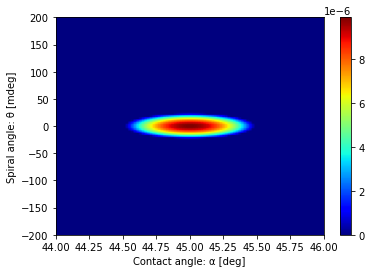

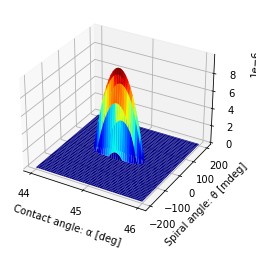

In [12]:
th = np.deg2rad(np.linspace(-0.2, 0.2, int(1e2)))
alp = np.deg2rad(np.linspace(44, 46, int(1e2)))

xyz = SP0.get_mesh(th, alp, 0)

x_ball = np.array([0., PCR, 0.])
R_ball = R + 1e-5

Disp_xyz = x_ball - xyz
Disp = R_ball - np.sqrt(np.sum(np.square(Disp_xyz), 2))
Disp[Disp<0.0] = 0.0

plt.imshow(Disp, cmap=cm.jet, extent=np.rad2deg([alp[0], alp[-1], 1e3 *th[0], 1e3 *th[-1]]), aspect='auto')
plt.xlabel('Contact angle: α [deg]')
plt.ylabel('Spiral angle: θ [mdeg]')
plt.colorbar()
plt.show()

Th, Alp = np.meshgrid(th, alp)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(np.rad2deg(Alp), 1e3 * np.rad2deg(Th), Disp.T, cmap=cm.jet)
ax.set_xticks([44, 45, 46])
ax.set_xlabel('Contact angle: α [deg]')
ax.set_ylabel('Spiral angle: θ [mdeg]')
plt.show()


Center Contact angle: α = 44.999954919505875 [deg]
Center Spiral angle:  θ = -8.002264094439286e-06 [mdeg]


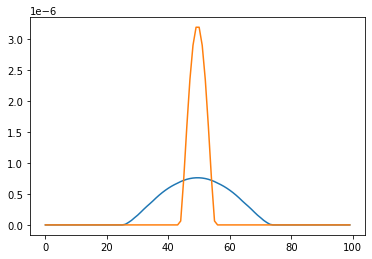

In [13]:
plt.plot(np.mean(Disp, axis=0))
plt.plot(np.mean(Disp, axis=1))

print('Center Contact angle: α = ' + str(np.rad2deg(alp @ np.mean(Disp, axis=0) / np.mean(Disp, axis=0).sum())) + ' [deg]')
print('Center Spiral angle:  θ = ' + str(1e3 * np.rad2deg(th @ np.mean(Disp, axis=1) / np.mean(Disp, axis=1).sum())) + ' [mdeg]')

## 3.1.1. Conclusion

- The distance between the surface of the spiral torus and some arbitrary point was determined. Here we do not deal with algebraic calculations, but only one representative example.
- The intersection point of the spiral tube and the ball can be well represented on a plane perpendicular to the center of the spiral.
- The spiral is the simplest mathematical expression with curvature and tortuosity. The fact that the center of the spiral, the center of the ball, the point of contact, and the length diameter of the contact ellipse all ride on the same plane suggests that in order to consider contact with a torus (here meaning the direct product set of the unit circumference), we must first find the center of the torus.

## 3.1.2.

a


In [14]:
SP1 = Spiral(alp=np.deg2rad(1e-3), l=10.0, r=PCR, eta=np.array([-dR, -dR]), R=Rg)
SP2 = Spiral(alp=np.deg2rad(-1e-3), l=10.0, r=PCR, eta=np.array([dR, dR]), R=Rg)

rho = 7.9e-3 # [g/mm^3]
Ball_m = 4/3 * np.pi * R**3 * rho

